## <center> TRẦN LÊ HOÀNG BẢO - 2174801090010 </center>
# <center> Bài thi cuối kỳ sử dụng MABAC Method  </center>

### Ví dụ minh họa 1: Ứng dụng mô hình hybrid đề xuất: Lựa chọn xe nâng

Quy trình vận chuyển là một phần mở rộng của quy trình sản xuất và là một trong những phân đoạn quan trọng nhất của quản lý hậu cần ở cấp công ty. Vận chuyển là cần thiết để đưa nguyên liệu thô và nguyên liệu phụ trợ đến nơi chế biến và để di chuyển hàng hóa trong chính quá trình sản xuất. Cuối cùng, thành phẩm hoặc bán thành phẩm có thể được đưa ra thị trường bằng nhiều loại phương tiện vận chuyển khác nhau. Một trong những hình thức vận chuyển hàng hóa được sử dụng thường xuyên nhất trong quá trình sản xuất thực tế đó là Xe nâng. Trong phần sau, dựa trên nghiên cứu được thực hiện bởi Atanaskovic et al. (2013), tiêu chí được chọn để lựa chọn các đơn vị xử lý vận chuyển (xe nâng) tối ưu.

### Bảng 1: Tiêu chí lựa chọn Xe nâng tối ưu.

| No. | Tiêu chí | Mô tả các tiêu chí             |
|-----|----------|--------------------------------|
| 1   | C1       | Giá mua                        |
| 2   | C2       | Bảo hành của nhà sản xuất      |
| 3   | C3       | Mạng lưới dịch vụ              |
| 4   | C4       | Có sẵn phụ tùng thay thế      |
| 5   | C5       | Chi phí bảo trì trung bình     |
| 6   | C6       | Mức tiêu thụ nhiên liệu        |
| 7   | C7       | Khả năng chịu lực tối đa       |
| 8   | C8       | Sức nâng tối đa                |
| 9   | C9       | Tốc độ di chuyển của xe nâng   |
| 10  | C10      | Tốc độ nâng/hạ tải            |

--- 

In [30]:
import numpy as np
import pandas as pd
from pymcdm.methods import MABAC
from pymcdm.normalizations import minmax_normalization
from pymcdm import helpers

class MABAC_example:
    def run_example():
        # Decision matrix
        matrix = np.array([[22600, 3800, 2, 5, 1.06, 3.00, 3.5, 2.8, 24.5, 6.5],
                           [19500, 4200, 3, 2, 0.95, 3.00, 3.4, 2.2, 24, 7.0],
                           [21700, 4000, 1, 3, 1.25, 3.20, 3.3, 2.5, 24.5, 7.3],
                           [20600, 3800, 2, 5, 1.05, 3.25, 3.2, 2.0, 22.5, 11.0],
                           [22500, 3800, 4, 3, 1.35, 3.20, 3.7, 2.1, 23, 6.3],
                           [23250, 4210, 3, 5, 1.45, 3.60, 3.5, 2.8, 23.5, 7.0],
                           [20300, 3850, 2, 5, 0.90, 3.25, 3.0, 2.6, 21.5, 6.0]])

        # Criteria weights
        weights = np.array([0.146, 0.144, 0.119, 0.121, 0.115, 0.101, 0.088, 0.068, 0.050, 0.048])

        # Criteria types
        types = np.array([-1, 1, 1, 1, -1, -1, 1, 1, 1, 1])

        # Create MABAC object
        mabac = MABAC(minmax_normalization)

        # Calculate preferences
        preferences = mabac(matrix, weights, types)

        # Print step-by-step calculations
        Normalized_Matrix = helpers.normalize_matrix(matrix, minmax_normalization, types)
        df_Normalized = pd.DataFrame(Normalized_Matrix, columns = range(1, 11)) # Sử dụng range(1, 11) làm tên cột
        print("Normalized Matrix:")
        print(df_Normalized)

        print("\nWeighted Matrix:")
        nmatrix = helpers.normalize_matrix(matrix, minmax_normalization, types)
        weighted_matrix = (nmatrix + 1) * weights
        df_Weighted = pd.DataFrame(weighted_matrix, columns = range(1, 11)) # Sử dụng range(1, 11) làm tên cột
        print(df_Weighted)

        print("\nBorder Approximation Area Matrix:")
        G = np.product(weighted_matrix, axis=0) ** (1 / len(matrix))
        df_G = pd.DataFrame(G, columns = ['G'])
        print(df_G)

        print("\nDistance of Alternatives from BAA Matrix:")
        Q = weighted_matrix - G
        df_Q = pd.DataFrame(Q, columns = range(1, 11)) # Sử dụng range(1, 11) làm tên cột
        print(df_Q)

        print("\nPreferences:")
        print(preferences)

        # Print ranking
        ranking = np.flip(np.argsort(preferences)) + 1
        print("\nRanking:")
        for i, rank in enumerate(ranking):
            print(f"A{rank}: Rank {i + 1} ({preferences[rank - 1]})")


# Run the example
MABAC_example.run_example()

Normalized Matrix:
         1         2         3         4         5         6         7   \
0  0.173333  0.000000  0.333333  1.000000  0.709091  1.000000  0.714286   
1  1.000000  0.975610  0.666667  0.000000  0.909091  1.000000  0.571429   
2  0.413333  0.487805  0.000000  0.333333  0.363636  0.666667  0.428571   
3  0.706667  0.000000  0.333333  1.000000  0.727273  0.583333  0.285714   
4  0.200000  0.000000  1.000000  0.333333  0.181818  0.666667  1.000000   
5  0.000000  1.000000  0.666667  1.000000  0.000000  0.000000  0.714286   
6  0.786667  0.121951  0.333333  1.000000  1.000000  0.583333  0.000000   

      8         9     10  
0  1.000  1.000000  0.10  
1  0.250  0.833333  0.20  
2  0.625  1.000000  0.26  
3  0.000  0.333333  1.00  
4  0.125  0.500000  0.06  
5  1.000  0.666667  0.20  
6  0.750  0.000000  0.00  

Weighted Matrix:
         1         2         3         4         5         6         7   \
0  0.171307  0.144000  0.158667  0.242000  0.196545  0.202000  0.150857

Dựa vào kết quả tính toán, ta có các nhận xét sau:

1. **Normalized Matrix**: Đây là ma trận đã được chuẩn hóa, trong đó các giá trị đã được đưa về khoảng từ 0 đến 1 để đồng nhất đơn vị đo lường của các tiêu chí. Các giá trị càng cao thể hiện mức độ tốt của mỗi tiêu chí đối với các lựa chọn tương ứng.

2. **Weighted Matrix**: Ma trận này được tính bằng cách nhân ma trận chuẩn hóa với vector trọng số của các tiêu chí. Kết quả là ma trận có trọng số, trong đó mỗi giá trị đã được điều chỉnh theo mức độ quan trọng của từng tiêu chí.

3. **Border Approximation Area (BAA) Matrix**: Đây là ma trận biểu diễn vùng biên xấp xỉ, là trung bình nhân lực của mỗi cột của ma trận có trọng số.

4. **Distance of Alternatives from BAA Matrix**: Ma trận này biểu diễn khoảng cách của các lựa chọn từ vùng biên xấp xỉ. Các giá trị dương thể hiện rằng lựa chọn đó cách xa vùng biên, trong khi các giá trị âm thể hiện sự gần gũi hơn.

5. **Preferences**: Là giá trị ưu tiên được tính toán cho mỗi lựa chọn. Các giá trị càng cao thể hiện mức độ ưu tiên càng cao.

6. **Ranking**: Kết quả sắp xếp thứ hạng của các lựa chọn dựa trên giá trị ưu tiên, từ cao đến thấp. Các lựa chọn được đánh giá cao hơn đứng trước trong danh sách. 

Nhận xét: Kết quả code hoàn toàn trùng khớp với kết quả tính toán theo công thức phần **2.3** đã cho trên, và
kết quả xếp hạng cũng cho thấy xe A2 là xe nâng tốt nhất và
được xếp hạng theo: A2 > A1 > A6 > A7 > A4 > A3 > A5

### Ví dụ minh họa 2: Chọn chiếc xe tốt nhất và phân loại chúng bằng MABAC

| Moto          | Giá (R$) | Bảo hiểm (R$) | Volume bình xăng (l) | Tiêu thụ nhiên liệu (Km/l) | Công suất (CV) |
|---------------|----------|----------------|------------------------|------------------------------|----------------|
| Tracer GT     | 60000    | 6500           | 21,4                   | 23                           | 115            |
| Tiger GT      | 59000    | 7200           | 20                      | 19,5                         | 95             |
| ST 1200       | 72000    | 6500           | 23                      | 21                           | 110            |
| Versys 1000 GT| 86000    | 3000           | 21                      | 18                           | 120            |
| Tiger 1200    | 84000    | 8500           | 20                      | 22                           | 141            |
| Africa Twin   | 65000    | 4500           | 19                      | 20                           | 89             |

---
### Tiêu Chí:
- **Giá (R$)**:
  - Loại: Min
  - Trọng số: 0.3
- **Bảo hiểm (R$)**:
  - Loại: Min
  - Trọng số: 0.3
- **Volume bình xăng (l)**:
  - Loại: Max
  - Trọng số: 0.3
- **Tiêu thụ nhiên liệu (Km/l)**:
  - Loại: Max
  - Trọng số: 0.3
- **Công suất (CV)**:
  - Loại: Max
  - Trọng số: 0.3

---

#### • Phương Pháp MABAC

In [36]:
import numpy as np
import pandas as pd
from pymcdm.methods import MABAC
from pymcdm.normalizations import minmax_normalization
from pymcdm import helpers

class MABAC_example:
    def run_example_2():
        # Decision matrix
        matrix = np.array([[60000, 6500, 21.4, 23, 115],
                           [59000, 7200, 20, 19.5, 95],
                           [72000, 6500, 23, 21, 110],
                           [86000, 3000, 21, 18, 120],
                           [84000, 8500, 20, 22, 141],
                           [65000, 4500, 19, 20, 89]])

        # Criteria weights
        weights = np.array([0.3, 0.3, 0.2, 0.1, 0.1])

        # Criteria types
        types = np.array([-1, -1, 1, 1, 1])

        # Create MABAC object
        mabac = MABAC(minmax_normalization)

        # Calculate preferences
        preferences = mabac(matrix, weights, types)

        # Print step-by-step calculations
        Normalized_Matrix = helpers.normalize_matrix(matrix, minmax_normalization, types)
        df_Normalized = pd.DataFrame(Normalized_Matrix, 
                        columns = ['Giá (C1)', 'Bảo hiểm (C2)', 'Dung tích bình xăng (C3)', 
                                   'Tiêu thụ nhiên liệu (C4)', 'Công suất (C5)'])
        print("Normalized Matrix:")
        print(df_Normalized)

        print("\nWeighted Matrix:")
        nmatrix = helpers.normalize_matrix(matrix, minmax_normalization, types)
        weighted_matrix = (nmatrix + 1) * weights
        df_Weighted = pd.DataFrame(Normalized_Matrix, 
                        columns = ['Giá (C1)', 'Bảo hiểm (C2)', 'Dung tích bình xăng (C3)', 
                                   'Tiêu thụ nhiên liệu (C4)', 'Công suất (C5)'])
        print(df_Weighted)

        print("\nBorder Approximation Area Matrix:")
        G = np.product(weighted_matrix, axis=0) ** (1 / len(matrix))
        df_G = pd.DataFrame(G, columns = ['G'])
        print(df_G)

        print("\nDistance of Alternatives from BAA Matrix:")
        Q = weighted_matrix - G
        df_Q = pd.DataFrame(Q, columns = range(1, 6)) # Sử dụng range(1, 6) làm tên cột
        print(df_Q)
        
        
        print("\nPreferences:")
        print(preferences)

        # Print ranking
        ranking = np.flip(np.argsort(preferences)) + 1
        print("\nRanking:")
        for i, rank in enumerate(ranking):
            print(f"Xe A{rank}: Rank {i + 1} ({preferences[rank - 1]})")


# Run the example
MABAC_example.run_example_2()

Normalized Matrix:
   Giá (C1)  Bảo hiểm (C2)  Dung tích bình xăng (C3)  \
0  0.962963       0.363636                      0.60   
1  1.000000       0.236364                      0.25   
2  0.518519       0.363636                      1.00   
3  0.000000       1.000000                      0.50   
4  0.074074       0.000000                      0.25   
5  0.777778       0.727273                      0.00   

   Tiêu thụ nhiên liệu (C4)  Công suất (C5)  
0                       1.0        0.500000  
1                       0.3        0.115385  
2                       0.6        0.403846  
3                       0.0        0.596154  
4                       0.8        1.000000  
5                       0.4        0.000000  

Weighted Matrix:
   Giá (C1)  Bảo hiểm (C2)  Dung tích bình xăng (C3)  \
0  0.962963       0.363636                      0.60   
1  1.000000       0.236364                      0.25   
2  0.518519       0.363636                      1.00   
3  0.000000       1.0000

Kết quả tính toán và xếp hạng cho thấy các xe trong bảng quyết định. Dựa trên giá trị ưu tiên, xe A1 được xếp hạng cao nhất, tiếp theo là xe A3 và A6. Trong khi đó, xe A5 có giá trị ưu tiên âm, cho thấy nó không được ưa chuộng trong lựa chọn.

#### • Phương Pháp TOPSIS

a1: 0.47
a2: 0.38
a3: 0.4
a4: 0.69
a5: 0.15
a6: 0.68


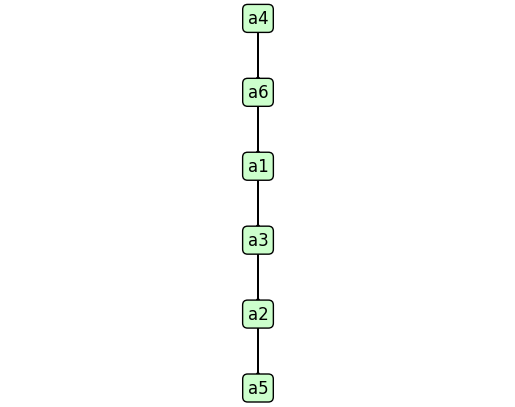

In [37]:
matrix = np.array([[60000, 6500, 21.4, 23, 115],
                    [59000, 7200, 20, 19.5, 95],
                    [72000, 6500, 23, 21, 110],
                    [86000, 3000, 21, 18, 120],
                    [84000, 8500, 20, 22, 141],
                    [65000, 4500, 19, 20, 89]])

# Criteria weights
weights = np.array([0.3, 0.3, 0.2, 0.1, 0.1])

# Criteria types
criterion_type = ['min', 'min', 'max', 'max', 'max']

from pyDecision.algorithm import topsis_method
relative_closeness = topsis_method(matrix, weights=weights, criterion_type=criterion_type, graph=True)

In [38]:
# Hiển thị kết quả
print("\nKết quả TOPSIS:")
for i, closeness in enumerate(relative_closeness):
    print(f"Xe A{i+1}: {closeness:.2f}")


Kết quả TOPSIS:
Xe A1: 0.47
Xe A2: 0.38
Xe A3: 0.40
Xe A4: 0.69
Xe A5: 0.15
Xe A6: 0.68


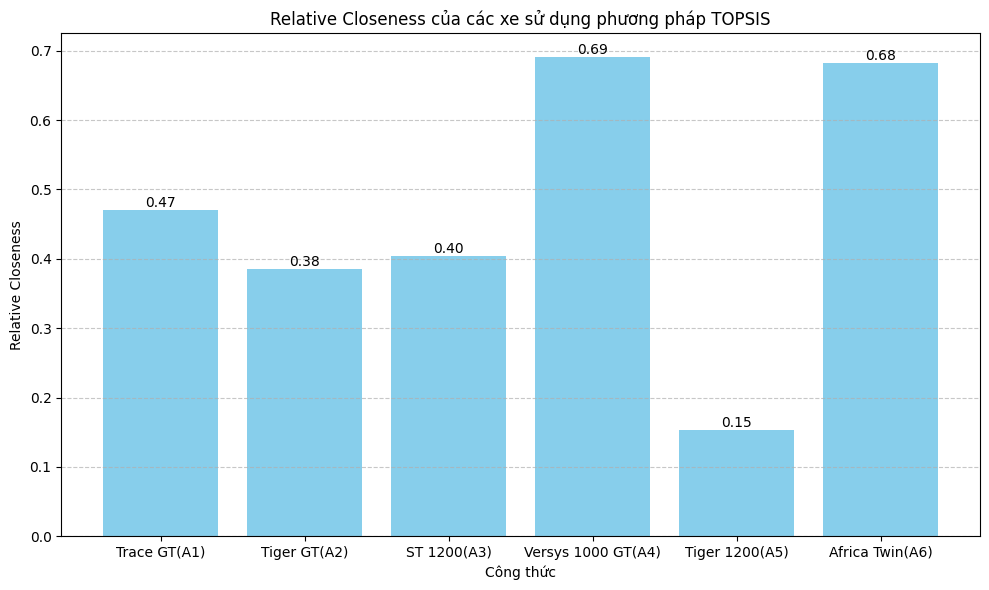

In [41]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột với chú thích điểm relative closeness
plt.figure(figsize=(10, 6))
bars = plt.bar(['Trace GT(A1)', 'Tiger GT(A2)', 'ST 1200(A3)', 'Versys 1000 GT(A4)', 
                'Tiger 1200(A5)', 'Africa Twin(A6)'], 
               relative_closeness, color='skyblue')

# Thêm chú thích điểm relative closeness
for bar, closeness in zip(bars, relative_closeness):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{closeness:.2f}', ha='center', va='bottom')

plt.xlabel('Công thức')
plt.ylabel('Relative Closeness')
plt.title('Relative Closeness của các xe sử dụng phương pháp TOPSIS')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### • Phương Pháp WASPAS

In [42]:
matrix = np.array([[60000, 6500, 21.4, 23, 115],
                    [59000, 7200, 20, 19.5, 95],
                    [72000, 6500, 23, 21, 110],
                    [86000, 3000, 21, 18, 120],
                    [84000, 8500, 20, 22, 141],
                    [65000, 4500, 19, 20, 89]])

# Criteria weights
weights = np.array([0.3, 0.3, 0.2, 0.1, 0.1])

# Criteria types
criterion_type = ['min', 'min', 'max', 'max', 'max']

In [43]:
# Hàm WASPAS
def waspas_method(dataset, criterion_type, weights, lambda_value):
    x = np.zeros((dataset.shape[0], dataset.shape[1]), dtype=float)

    for j in range(dataset.shape[1]):
        if criterion_type[j] == 'max':
            x[:, j] = ((dataset.values[:, j] - np.min(dataset.values[:, j])) / (np.max(dataset.values[:, j]) - np.min(dataset.values[:, j])))
        else:
            x[:, j] = ((np.max(dataset.values[:, j]) - dataset.values[:, j]) / (np.max(dataset.values[:, j]) - np.min(dataset.values[:, j])))
            
    wsm = np.sum(x * weights, axis=1)
    wpm = np.prod(x ** weights, axis=1)
    waspas = (lambda_value) * wsm + (1 - lambda_value) * wpm
    
    return wsm, wpm, waspas

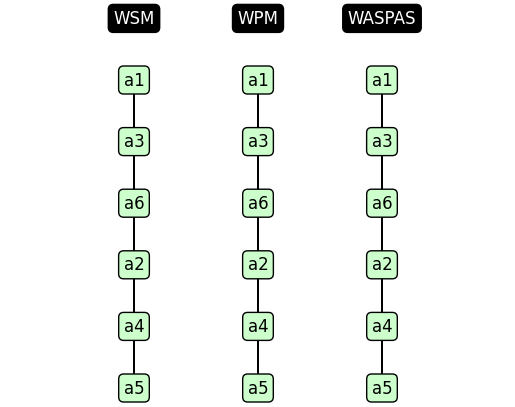

Kết quả đánh giá các phương án sử dụng phương pháp WASPAS:
  Phương án  Weighted Sum  Weighted Product  WASPAS Score
0        A1      1.667980          1.647477      1.657728
1        A2      1.462448          1.423874      1.443161
2        A3      1.565031          1.549478      1.557255
3        A4      1.459615          1.399055      1.429335
4        A5      1.252222          1.214290      1.233256
5        A6      1.491515          1.448053      1.469784


In [44]:
# Giá trị lambda có thể thay đổi
lambda_value = 0.5

# Áp dụng phương pháp WASPAS từ thư viện
from pyDecision.algorithm import waspas_method
wsm, wpm, waspas = waspas_method(matrix, criterion_type, weights, lambda_value)

# Hiển thị kết quả
results = pd.DataFrame({
    'Phương án': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'],
    'Weighted Sum': wsm,
    'Weighted Product': wpm,
    'WASPAS Score': waspas
})

print("Kết quả đánh giá các phương án sử dụng phương pháp WASPAS:")
print(results)